### **ME 639: Introduction to Robotics | Midsem Examination**
Chaman Modi | 20310015

Importing necessary libraries and some useful function

In [1]:
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as m
import sympy as sp
sp.init_printing()
from sympy import symbols
from sympy import sympify
from sympy import *
import random
import pandas as pd 


# Forward Kinematics 2R Planar Fixed Axis
def forward_kinematics_2R(q1, q2, l1, l2):
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = l1 * np.cos(q1) + l2 * np.cos(q2)  # l2*np.cos(q2+q1) will be second term if q2 measured from link1
    y2 = l1 * np.sin(q1) + l2 * np.sin(q2)  # l2*np.sin(q2+q1) will be second term if q2 measured from link1
    return x1, y1, x2, y2

# Inverse Kinematics 2R Planar Fixed Axis
def inverse_kinematics_2R(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    return q1, q2

### Solution 1


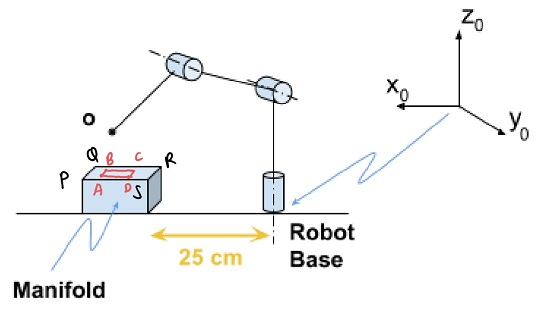


### (a) Varification for the point A, B, C, D to be within workspace
$(a_1)$ Stanford type (RRP) configuration\
$(a_2)$ PUMA type (RRR) configuration\
$(a_3)$ SCARA type (RRP) configuration

Point A, B, C, D are given by (0.45,0.075,0.1), (0.45,-0.075,0.1), (0.25,-0.075,0.1) and (0.25,0.075,0.1) respectively. Also, both link lengths $l_1$ and $l_2$ are given as 0.25 m.

In [2]:
l0 = 0.25
l1 = 0.25
l2 = 0.25
l3 = 0.25
A = np.array([0.45,0.075,0.1])
B = np.array([0.45,-0.075,0.1])
C = np.array([0.25,-0.075,0.1])
D = np.array([0.25,0.075,0.1])

$(a_1)$ Stanford type (RRP) configuration

In [3]:
def inverse_kinematics_stanford(P0,l1,l2):
    x = P0[0]
    y = P0[1]
    z = P0[2]
    phi = np.arctan2(y,x)
    r = np.sqrt(x**2 + y**2)
    s = z - l1
    t = np.sqrt(r**2 - l2**2)
    theta1 = phi - np.arctan2(l2,t)
    theta2 = np.arctan2(np.cos(theta1)*x + np.sin(theta1)*y, s)
    d3 = np.sin(theta2)*(np.cos(theta1)*x + np.sin(theta1)*y) + np.cos(theta2)*s
    print("theta1 = ", theta1)
    print("theta2 = ", theta2)
    print("d3 = ", d3, "\n")
    return theta1, theta2, d3
    
def forward_kinematics_stanford(theta1,theta2,d3):
    x = -l2*np.sin(theta1) + d3*np.sin(theta2)*np.cos(theta1)
    y = l2*np.cos(theta1) + d3*np.sin(theta2)*np.sin(theta1)
    z = d3*np.cos(theta2) + l1
    print("x = ",x)
    print("y = ",y)
    print("z = ",z)
    return np.array([[x,y,z]])

#### Check for point A

In [4]:
theta1,theta2,d3 = inverse_kinematics_stanford(A,l1,l2)

theta1 =  -0.41481867062111377
theta2 =  1.9453169857298875
d3 =  0.4100304866714181 



In [5]:
P = forward_kinematics_stanford(theta1,theta2,d3)

x =  0.45
y =  0.07500000000000001
z =  0.1


#### Check for point B

In [6]:
theta1,theta2,d3 = inverse_kinematics_stanford(B,l1,l2)

theta1 =  -0.7451160254503674
theta2 =  1.9453169857298875
d3 =  0.4100304866714181 



In [7]:
P =forward_kinematics_stanford(theta1,theta2,d3)

x =  0.44999999999999996
y =  -0.07500000000000001
z =  0.1


#### Check for point C

In [8]:
theta1,theta2,d3 = inverse_kinematics_stanford(C,l1,l2)

theta1 =  -1.5707963267948966
theta2 =  2.677945044588987
d3 =  0.16770509831248423 



In [9]:
P =forward_kinematics_stanford(theta1,theta2,d3)

x =  0.25
y =  -0.07500000000000001
z =  0.1


#### Check for point D

In [10]:
theta1,theta2,d3 = inverse_kinematics_stanford(D,l1,l2)

theta1 =  -0.9878827378391623
theta2 =  2.677945044588987
d3 =  0.16770509831248426 



In [11]:
P = forward_kinematics_stanford(theta1,theta2,d3)

x =  0.25
y =  0.07500000000000001
z =  0.09999999999999998


$(a_2)$ PUMA type (RRR) configuration

In [12]:
# Code taken from shared repository

def inverse_kinematics_puma(P0,l1,l2,l3):
    xc = P0[0]
    yc = P0[1]
    zc = P0[2]
    theta1 = np.rad2deg(m.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("SINGULAR CONFIGURATION")
    if D>1 or D<-1:
        print("OUTSIDE WORKSPACE")
    theta3 = (m.atan2((-m.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(m.atan2(zc-l1,(m.sqrt(xc*xc+yc*yc)))-m.atan2((l3*m.sin(theta3)),(l2+l3*m.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    print("theta1 = ", theta1)
    print("theta2 = ", theta2)
    print("theta3 = ", theta3)
    return theta1,theta2,theta3

def forward_kinematics_puma(theta1,theta2,theta3,l1,l2,l3):
    theta1 = theta1*np.pi/180
    theta2 = theta2*np.pi/180
    theta3 = theta3*np.pi/180
    x= np.cos(theta1)* (l3*np.cos(theta2+theta3)+ l2*np.cos(theta2))
    y= np.sin(theta1) * (l3*np.cos(theta2+theta3)+ l2*np.cos(theta2))
    z= l1+ l3*np.sin(theta2+theta3) +l2*np.sin(theta2)
    print("x = ",x)
    print("y = ",y)
    print("z = ",z)
    return x,y,z

##### Check for point A

In [13]:
theta1,theta2,theta3 = inverse_kinematics_puma(A,l0,l1,l2)

theta1 =  9.462322208025617
theta2 =  -2.0367282034521836
theta3 =  -32.328064122162274


In [14]:
x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

x =  0.45000000000000007
y =  0.075
z =  0.1


##### Check for point B

In [15]:
theta1,theta2,theta3 = inverse_kinematics_puma(B,l0,l1,l2)

theta1 =  -9.462322208025617
theta2 =  -2.0367282034521836
theta3 =  -32.328064122162274


In [16]:
x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

x =  0.45000000000000007
y =  -0.075
z =  0.1


##### Check for point C

In [17]:
theta1,theta2,theta3 = inverse_kinematics_puma(C,l0,l1,l2)

theta1 =  -16.69924423399362
theta2 =  23.09520684670464
theta3 =  -105.96201416284724


In [18]:
x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

x =  0.24999999999999992
y =  -0.07499999999999998
z =  0.1


##### Check for point D

In [19]:
theta1,theta2,theta3 = inverse_kinematics_puma(D,l0,l1,l2)

theta1 =  16.69924423399362
theta2 =  23.09520684670464
theta3 =  -105.96201416284724


In [20]:
x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

x =  0.24999999999999992
y =  0.07499999999999998
z =  0.1


$(a_3)$ SCARA type (RRR) configuration

In [21]:
# Inverse and forwward kinematics code for SCARA type configuration

def inverse_kinematic_scara(P0,l0,l1,l2):
    x = P0[0]
    y = P0[1]
    z = P0[2]
    r = abs((x**2+y**2-l1**2-l2**2)/(2*l1*l2))
    if r>1 or r<-1:
        print('OUTSIDE WORKSPACE')
    theta2 = np.arctan(np.sqrt(1-r**2)/r)
    theta1 = np.arctan(y/x) - np.arctan((l2*np.sin(theta2))/(l1+l2*np.cos(theta2)))
    d3 = l0-z
    theta1 = theta1*180/np.pi
    theta2 = theta2*180/np.pi
    print("theta1 = ", theta1)
    print("theta2 = ", theta2)
    print("d3 = ", d3, "\n")
    return theta1,theta2,d3

def forward_kinematics_scara(theta1,theta2,d3,l0,l1,l2):
    theta1= theta1*np.pi/180
    theta2=theta2*np.pi/180
    p0= np.array([[l1*np.cos(theta1)+ l2*np.cos(theta1+theta2)],
                  [l1*np.sin(theta1)+ l2*np.sin(theta1+theta2)],
                  [l0-d3]])
    print("x = ",x)
    print("y = ",y)
    print("z = ",z)
    return p0

##### Check for point A

In [22]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

theta1 =  -14.696515095304628
theta2 =  48.31767460666049
d3 =  0.15 



In [23]:
x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

x =  0.24999999999999992
y =  0.07499999999999998
z =  0.1


##### Check for point B

In [24]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

theta1 =  -14.696515095304628
theta2 =  48.31767460666049
d3 =  0.15 



In [25]:
x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

x =  [0.45]
y =  [0.075]
z =  [0.1]


##### Check for point C

In [26]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

theta1 =  -14.696515095304628
theta2 =  48.31767460666049
d3 =  0.15 



In [27]:
x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

x =  [0.45]
y =  [0.075]
z =  [0.1]


##### Check for point D

In [28]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

theta1 =  -14.696515095304628
theta2 =  48.31767460666049
d3 =  0.15 



In [29]:
x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

x =  [0.45]
y =  [0.075]
z =  [0.1]


### (b) Code for user input values of A, B, C, D

In [30]:
A = np.zeros((3,1))
B = np.zeros((3,1))
C = np.zeros((3,1))
D = np.zeros((3,1))

for i in range(4):
    for j in range(3):
        if i==0:
            A[j] = input('Input one by one coordinates of point A:\n')
        if i==1:
            B[j] = input('Input one by one coordinates of point B:\n')
        if i==2:
            C[j] = input('Input one by one coordinates of point C:\n')
        if i==3:
            D[j] = input('Input one by one coordinates of point D:\n')
            
            
            
            
# Do feed the following values for checking, any other values may be given but should be within the workspace
# A = 0.42 0.055 0.1
# B = 0.42 -0.055 0.1
# C = 0.28 -0.055 0.1
# D = 0.28 0.055 0.1

Input one by one coordinates of point A:
0.42
Input one by one coordinates of point A:
0.055
Input one by one coordinates of point A:
0.1
Input one by one coordinates of point B:
0.42
Input one by one coordinates of point B:
-0.055
Input one by one coordinates of point B:
0.1
Input one by one coordinates of point C:
0.28
Input one by one coordinates of point C:
-0.055
Input one by one coordinates of point C:
0.1
Input one by one coordinates of point D:
0.28
Input one by one coordinates of point D:
0.055
Input one by one coordinates of point D:
0.1


$(b_1)$ Stanford type (RRP) configuration

In [31]:
theta1,theta2,d3 = inverse_kinematics_stanford(A,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point A')

theta1 =  [-0.50109399]
theta2 =  [1.98418807]
d3 =  [0.37339657] 

x =  [0.42]
y =  [0.055]
z =  [0.1]

Obtained values are same as input values for point A


In [32]:
theta1,theta2,d3 = inverse_kinematics_stanford(B,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point B')

theta1 =  [-0.76151688]
theta2 =  [1.98418807]
d3 =  [0.37339657] 

x =  [0.42]
y =  [-0.055]
z =  [0.1]

Obtained values are same as input values for point B


In [33]:
theta1,theta2,d3 = inverse_kinematics_stanford(C,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point C')

theta1 =  [-1.26170295]
theta2 =  [2.3993985]
d3 =  [0.20353132] 

x =  [0.28]
y =  [-0.055]
z =  [0.1]

Obtained values are same as input values for point C


In [34]:
theta1,theta2,d3 = inverse_kinematics_stanford(D,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point D')

theta1 =  [-0.87378466]
theta2 =  [2.3993985]
d3 =  [0.20353132] 

x =  [0.28]
y =  [0.055]
z =  [0.1]

Obtained values are same as input values for point D


$(b_2)$ Puma type (RRR) configuration

In [35]:
theta1,theta2,theta3 = inverse_kinematics_puma(A,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point A')

theta1 =  7.460566126168351
theta2 =  6.509459926469543
theta3 =  -52.01900924751933
x =  0.42
y =  0.05499999999999999
z =  0.1

Obtained values are same as input values for point A


In [36]:
theta1,theta2,theta3 = inverse_kinematics_puma(B,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point B')

theta1 =  -7.460566126168351
theta2 =  6.509459926469543
theta3 =  -52.01900924751933
x =  0.42
y =  -0.05499999999999999
z =  0.1

Obtained values are same as input values for point B


In [37]:
theta1,theta2,theta3 = inverse_kinematics_puma(C,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point C')

theta1 =  -11.1130405359483
theta2 =  22.123701305897953
theta3 =  -99.70643007259085
x =  0.28
y =  -0.055
z =  0.09999999999999999

Obtained values are same as input values for point C


In [38]:
theta1,theta2,theta3 = inverse_kinematics_puma(D,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point D')

theta1 =  11.1130405359483
theta2 =  22.123701305897953
theta3 =  -99.70643007259085
x =  0.28
y =  0.055
z =  0.09999999999999999

Obtained values are same as input values for point D


$(b_3)$ SCARA type (RRP) configuration

In [39]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point A')

theta1 =  [-24.63405926]
theta2 =  [64.18925077]
d3 =  [0.15] 

x =  0.28
y =  0.055
z =  0.09999999999999999

Obtained values are same as input values for point A


In [40]:
theta1,theta2, d3 = inverse_kinematic_scara(B,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point B')

theta1 =  [-39.55519151]
theta2 =  [64.18925077]
d3 =  [0.15] 

x =  [[0.42]]
y =  [[0.055]]
z =  [[0.1]]

Obtained values are same as input values for point B


In [41]:
theta1,theta2, d3 = inverse_kinematic_scara(C,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point C')

theta1 =  [-45.91218616]
theta2 =  [69.59829125]
d3 =  [0.15] 

x =  [[0.42]]
y =  [[-0.055]]
z =  [[0.1]]

Obtained values are same as input values for point C


In [42]:
theta1,theta2, d3 = inverse_kinematic_scara(D,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point D')

theta1 =  [-23.68610509]
theta2 =  [69.59829125]
d3 =  [0.15] 

x =  [[0.40288002]]
y =  [[-0.07913715]]
z =  [[0.1]]

Obtained values are same as input values for point D


$(c)$ Coordinates of points A, B, C, D are given for the 5 cm x 5 cm square on manifold block.
> $A (0.40,0.06,0.1)$\
> $B (0.40,0.01,0.1)$\
> $C (0.35,0.01,0.1)$\
> $D (0.35,0.06,0.1)$

In [43]:
A = np.array([0.40,0.06,0.1])
B = np.array([0.40,0.01,0.1])
C = np.array([0.35,0.01,0.1])
D = np.array([0.35,0.06,0.1])

$(c_1)$ Stanford type (RRP) configuration

In [44]:
theta1,theta2,d3 = inverse_kinematics_stanford(A,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point A')

theta1 =  -0.5174146543995926
theta2 =  2.0115929687793694
d3 =  0.35156791662493897 

x =  0.4
y =  0.06
z =  0.09999999999999995

Obtained values are same as input values for point A


In [45]:
theta1,theta2,d3 = inverse_kinematics_stanford(B,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point B')

theta1 =  -0.6498866813271296
theta2 =  2.018428698153693
d3 =  0.34655446902326925 

x =  0.40000000000000013
y =  0.010000000000000009
z =  0.09999999999999998

Obtained values are same as input values for point B


In [46]:
theta1,theta2,d3 = inverse_kinematics_stanford(C,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point C')

theta1 =  -0.7666230590338181
theta2 =  2.1198928158776433
d3 =  0.2874021572639982 

x =  0.35
y =  0.009999999999999981
z =  0.1

Obtained values are same as input values for point C


In [47]:
theta1,theta2,d3 = inverse_kinematics_stanford(D,l1,l2)

P = forward_kinematics_stanford(theta1,theta2,d3)

print('\nObtained values are same as input values for point D')

theta1 =  -0.6112582163474365
theta2 =  2.1073751697101497
d3 =  0.2934280150224242 

x =  0.35
y =  0.06
z =  0.09999999999999992

Obtained values are same as input values for point D


$(c_2)$ PUMA type (RRR) configuration

In [48]:
theta1,theta2,theta3 = inverse_kinematics_puma(A,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point A')

theta1 =  8.530765609948132
theta2 =  10.021774320678787
theta3 =  -60.73826046718986
x =  0.39999999999999997
y =  0.05999999999999999
z =  0.10000000000000002

Obtained values are same as input values for point A


In [49]:
theta1,theta2,theta3 = inverse_kinematics_puma(B,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point B')

theta1 =  1.4320961841646465
theta2 =  10.730467753654535
theta3 =  -62.561257903728745
x =  0.4
y =  0.01
z =  0.09999999999999998

Obtained values are same as input values for point B


In [50]:
theta1,theta2,theta3 = inverse_kinematics_puma(C,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point C')

theta1 =  1.6365770416167185
theta2 =  17.183205138077344
theta3 =  -80.74666588023383
x =  0.35
y =  0.010000000000000002
z =  0.1

Obtained values are same as input values for point C


In [51]:
theta1,theta2,theta3 = inverse_kinematics_puma(D,l0,l1,l2)

x,y,z = forward_kinematics_puma(theta1,theta2,theta3,l0,l1,l2)

print('\nObtained values are same as input values for point D')

theta1 =  9.727578551401603
theta2 =  16.658959439383853
theta3 =  -79.11723814462898
x =  0.35
y =  0.059999999999999984
z =  0.09999999999999999

Obtained values are same as input values for point D


$(c_3)$ SCARA type (RRR) configuration

In [52]:
theta1,theta2, d3 = inverse_kinematic_scara(A,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point A')

theta1 =  -27.475770490137336
theta2 =  72.01307220017094
d3 =  0.15 

x =  0.35
y =  0.059999999999999984
z =  0.09999999999999999

Obtained values are same as input values for point A


In [53]:
theta1,theta2, d3 = inverse_kinematic_scara(B,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point B')

theta1 =  -35.4139253154836
theta2 =  73.6920429992965
d3 =  0.15 

x =  [0.4]
y =  [0.06]
z =  [0.1]

Obtained values are same as input values for point B


In [54]:
theta1,theta2, d3 = inverse_kinematic_scara(C,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point C')

theta1 =  -42.81334967502452
theta2 =  88.89985343328246
d3 =  0.15 

x =  [0.4]
y =  [0.01]
z =  [0.1]

Obtained values are same as input values for point C


In [55]:
theta1,theta2, d3 = inverse_kinematic_scara(D,l0,l1,l2)

x,y,z = forward_kinematics_scara(theta1,theta2, d3,l0,l1,l2)

print('\nObtained values are same as input values for point D')

theta1 =  -35.02031676483832
theta2 =  89.49579063247985
d3 =  0.15 

x =  [0.35678577]
y =  [0.01019388]
z =  [0.1]

Obtained values are same as input values for point D


## Solution 3
### (b) For our convenience and keeping the origin of manipulator at (0,0,0), we shifted the gait trajectory.

Text(0.5, 1.0, 'Gait Trajectory')

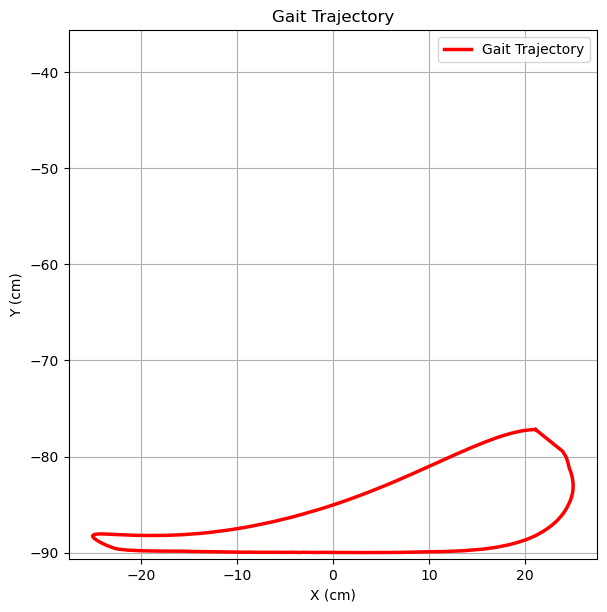

In [56]:
data = pd.read_excel("Gait_DATA.xlsx")
x_coord = np.array(data['X (cm)'])-25     # X coordinates of trajectory is shifted by 45 cm.
y_coord = np.array(data['Y (cm)'])-90     # Y coordinates of trajectory is shifted by 90 cm.

plt.figure(figsize=(7,7), dpi=100)
plt.plot(x_coord,y_coord,'r-',linewidth=2.5)
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.grid()
plt.axis('square')
plt.legend(['Gait Trajectory'])
plt.title('Gait Trajectory')

### (c) We applied inverse kinematics on the transformed gait trajectory and computed $q_1$ and $q_2$ joint variables. Then, these $q_1$ and $q_2$ values are subtituted back to the forward klinematics and trajectory is traced back and plotted with the initial trajectory on the same plot for comparision. In addition to that variation of $q_1$ and $q_2$ is also ploted along the trajectory.

Text(0.5, 1.0, 'Plot of $q_1$ & $q_2$ along trajectory points')

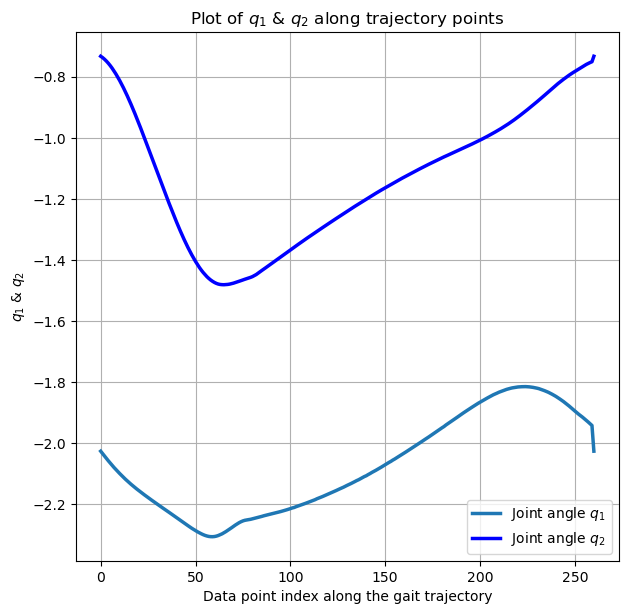

In [57]:
# Inverse kinematics for 2R manipulator
# x_coord and y_coord is the coordinates of gait trajectory.

# As we assumed in 3(a) link lengths l1 = 45 cm and l2 = 55 cm
l1 = 45
l2 = 55
elbow = 1    # 1 means elbow down configuration
n = len(x_coord)

Q = np.zeros((n,2))
q1,q2 = inverse_kinematics_2R(x_coord, y_coord, l1, l2, elbow)

plt.figure(figsize=(7,7), dpi=100)
plt.plot()
plt.plot(np.arange(0,n,1),q1,np.arange(0,n,1),q2,'b-',linewidth=2.5)
plt.grid()
plt.xlabel('Data point index along the gait trajectory')
plt.ylabel('$q_1$ & $q_2$')
plt.legend(['Joint angle $q_1$','Joint angle $q_2$'])
plt.title('Plot of $q_1$ & $q_2$ along trajectory points')

Text(0.5, 1.0, 'Gait Trajectory')

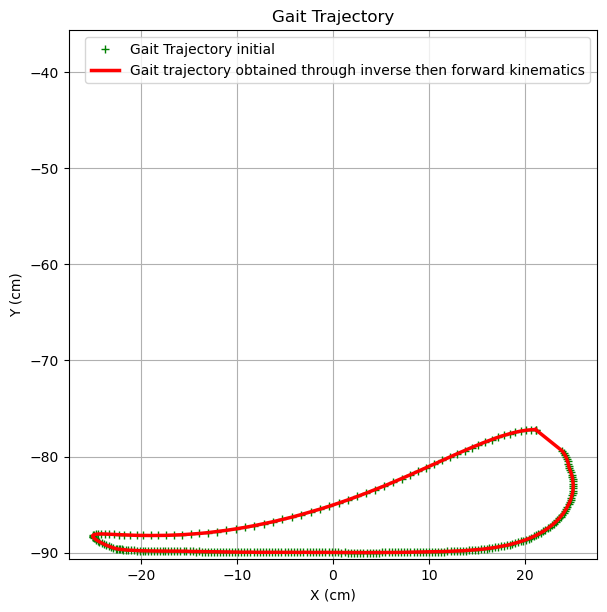

In [58]:
x1,y1,x2,y2 = forward_kinematics_2R(q1, q2, l1, l2)

plt.figure(figsize=(7,7), dpi=100)
plt.plot(x2,y2,'g+',x_coord,y_coord,'r-',linewidth=2.5)
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.grid()
plt.axis('square')
plt.legend(['Gait Trajectory initial','Gait trajectory obtained through inverse then forward kinematics'])
plt.title('Gait Trajectory')